In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Carguemos los datos y exploremos:

In [2]:
data = pd.read_csv('datos.csv')
data.head()

,x1,y
0,1.303226,-0.944786
1,0.547733,-0.421419
2,8.895933,-0.501841
3,6.497242,-0.180428
4,1.019916,-0.837501


In [3]:
data.describe()

,x1,y
count,400.000000,400.000000
mean,4.718763,-0.163948
std,2.738041,0.673724
min,0.018887,-0.988817
25%,2.337307,-0.765024
50%,4.693502,-0.340517
75%,7.111080,0.442109
max,9.424778,1.090830


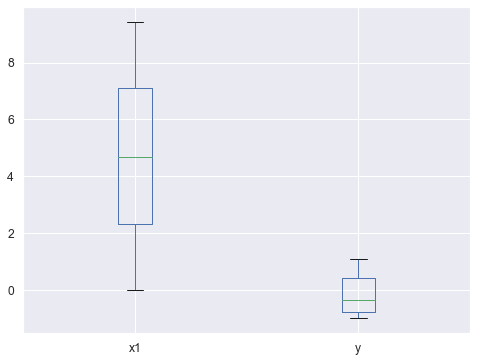

In [4]:
sns.set(font_scale=1.1)
data.plot.box(figsize=(8,6))
plt.show()

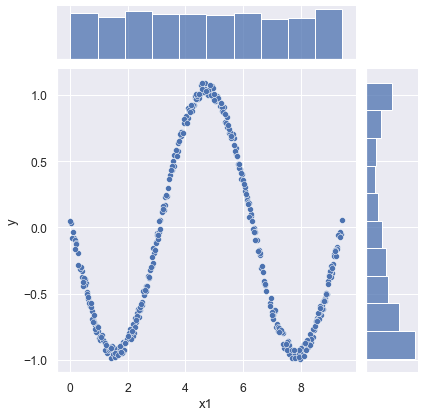

In [5]:
sns.jointplot(data=data,x='x1',y='y')
plt.show()

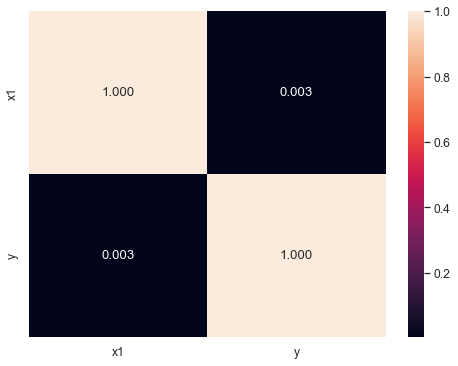

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data.corr(),
    annot=True,
    fmt=".3f",
    )
plt.show()

Agreguemos una entrada nueva:

In [7]:
data['x2']=np.sin(data['x1'])
data.head()

,x1,y,x2
0,1.303226,-0.944786,0.964416
1,0.547733,-0.421419,0.520753
2,8.895933,-0.501841,0.504537
3,6.497242,-0.180428,0.212425
4,1.019916,-0.837501,0.852064


Ahora separemos en datos de entrenamiento y pruebas:

In [8]:
xTrain,xTest,yTrain,yTest = train_test_split(
    data[['x1','x2']].values,
    data['y'].values,
    train_size=0.7,
    random_state=150)

Entrenemos el modelo y realicemos pruebas de desempeño:

In [9]:
modelo = LinearRegression()
modelo.fit(xTrain, yTrain)
modelo.coef_,modelo.intercept_

(array([-8.59796398e-04, -9.97030198e-01]), 0.052328414914355165)

In [10]:
# Coeficiente R2
print(modelo.score(xTrain, yTrain))
print(modelo.score(xTest, yTest))

0.9982392545716678
0.9977890171823325


In [11]:
# Error absoluto medio
print(mean_absolute_error(yTrain, modelo.predict(xTrain)))
print(mean_absolute_error(yTest, modelo.predict(xTest)))

0.02457815853263706
0.027168548023714163


Usemos el modelo con datos diferentes a los de entrenamiento/pruebas:

In [12]:
x=np.pi
modelo.predict([[x,np.sin(x)]])

array([0.04962728])

Por último, visualicemos las entradas de prueba evaluadas en el modelo respecto al dataset de entrenamiento:

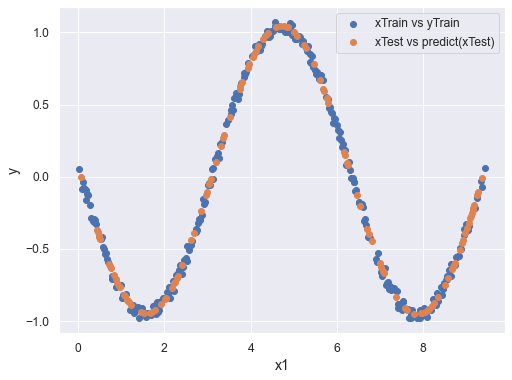

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(xTrain[:,0],yTrain,label='xTrain vs yTrain')
plt.scatter(xTest[:,0], modelo.predict(xTest),label='xTest vs predict(xTest)')
plt.legend()
plt.xlabel('x1',size=14)
plt.ylabel('y',size=14)
plt.show()